## Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix, roc_curve
import collections

## Primeiras análises

In [2]:
# importando o dataset
df = pd.read_csv('creditcard.csv')

In [3]:
# visualização inicial
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# verificando o nome das colunas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# verificando o tamanho do dataset
df.shape

(284807, 31)

In [6]:
# verificando a presença de valores nulos e ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# verificando dados duplicados
df.duplicated().sum()

1081

In [8]:
# panoramada do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# describe das variáveis mais importantes
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


São 492 valores de fraudes.
São 284315 valores de não fraudes.


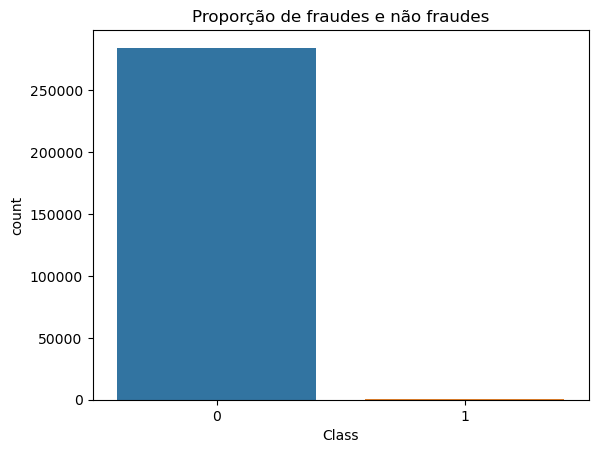

In [10]:
# verificando se os dados são balanceados
fraudes = len(df[df["Class"]==1])
nao_Fraudes = len(df[df["Class"]==0])
print(f"São {fraudes} valores de fraudes.")
print(f"São {nao_Fraudes} valores de não fraudes.")

sns.countplot(data=df,x="Class")
plt.title("Proporção de fraudes e não fraudes")
plt.show()

Como vimos acima, a classe 1 (fraudes) possui uma quantidade de valores muito menor do que a classe 0 (não fraudes). Como isso pode representar um problema para os modelos, vamos balancear.

In [11]:
# reescalando as colunas Amount e Time
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

## Undersampling

In [12]:
# separando as amostras das classes
fraud_samples = df[df['Class'] == 1]
non_fraud_samples = df[df['Class'] == 0]

# subamostrando aleatória da classe majoritária
undersampled_non_fraud = resample(non_fraud_samples,
                                 replace=False,  # Não permitir substituição
                                 n_samples=len(fraud_samples),  # Igualar ao número de fraudes
                                 random_state=42)  # Reprodutibilidade

# concatenando os dados subamostrados
undersampled_df = pd.concat([undersampled_non_fraud, fraud_samples])

# misturando as amostras
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

# verificando o balanceamento das classes
undersampled_df['Class'].value_counts()


1    492
0    492
Name: Class, dtype: int64

## Oversampling

In [13]:
# separando as amostras das classes
fraud_samples = df[df['Class'] == 1]
non_fraud_samples = df[df['Class'] == 0]

# sobreamostrando aleatória da classe minoritária
oversampled_fraud = resample(fraud_samples,
                             replace=True,  # Permitir substituição
                             n_samples=len(non_fraud_samples),  # Igualar ao número de não fraudes
                             random_state=42)  # Reprodutibilidade

# concatenando os dados sobreamostrados
oversampled_df = pd.concat([non_fraud_samples, oversampled_fraud])

# emabralhando as amostras
oversampled_df = oversampled_df.sample(frac=1, random_state=42)

# verificando o balanceamento das classes
oversampled_df['Class'].value_counts()


1    284315
0    284315
Name: Class, dtype: int64

## Oversampling com SMOTE

In [14]:
# separando as amostras das classes
X = df.drop('Class', axis=1)  # Recursos/atributos
y = df['Class']  # Classe alvo

# aplicando SMOTE para gerar amostras sintéticas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# criando um novo DataFrame com os dados balanceados
balanced_smote = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# verificando o balanceamento das classes
balanced_smote['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## Combinação com SMOTE

In [17]:
# separando as amostras das classes
X = df.drop('Class', axis=1)  # Recursos/atributos
y = df['Class']  # Classe alvo

# aplicando a subamostragem aleatória na classe majoritária
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# aplicando o SMOTE na classe minoritária
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_undersampled, y_undersampled)

# criando um novo DataFrame com os dados balanceados
balanced_combination = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# verificando o balanceamento das classes
balanced_combination['Class'].value_counts()


0    492
1    492
Name: Class, dtype: int64

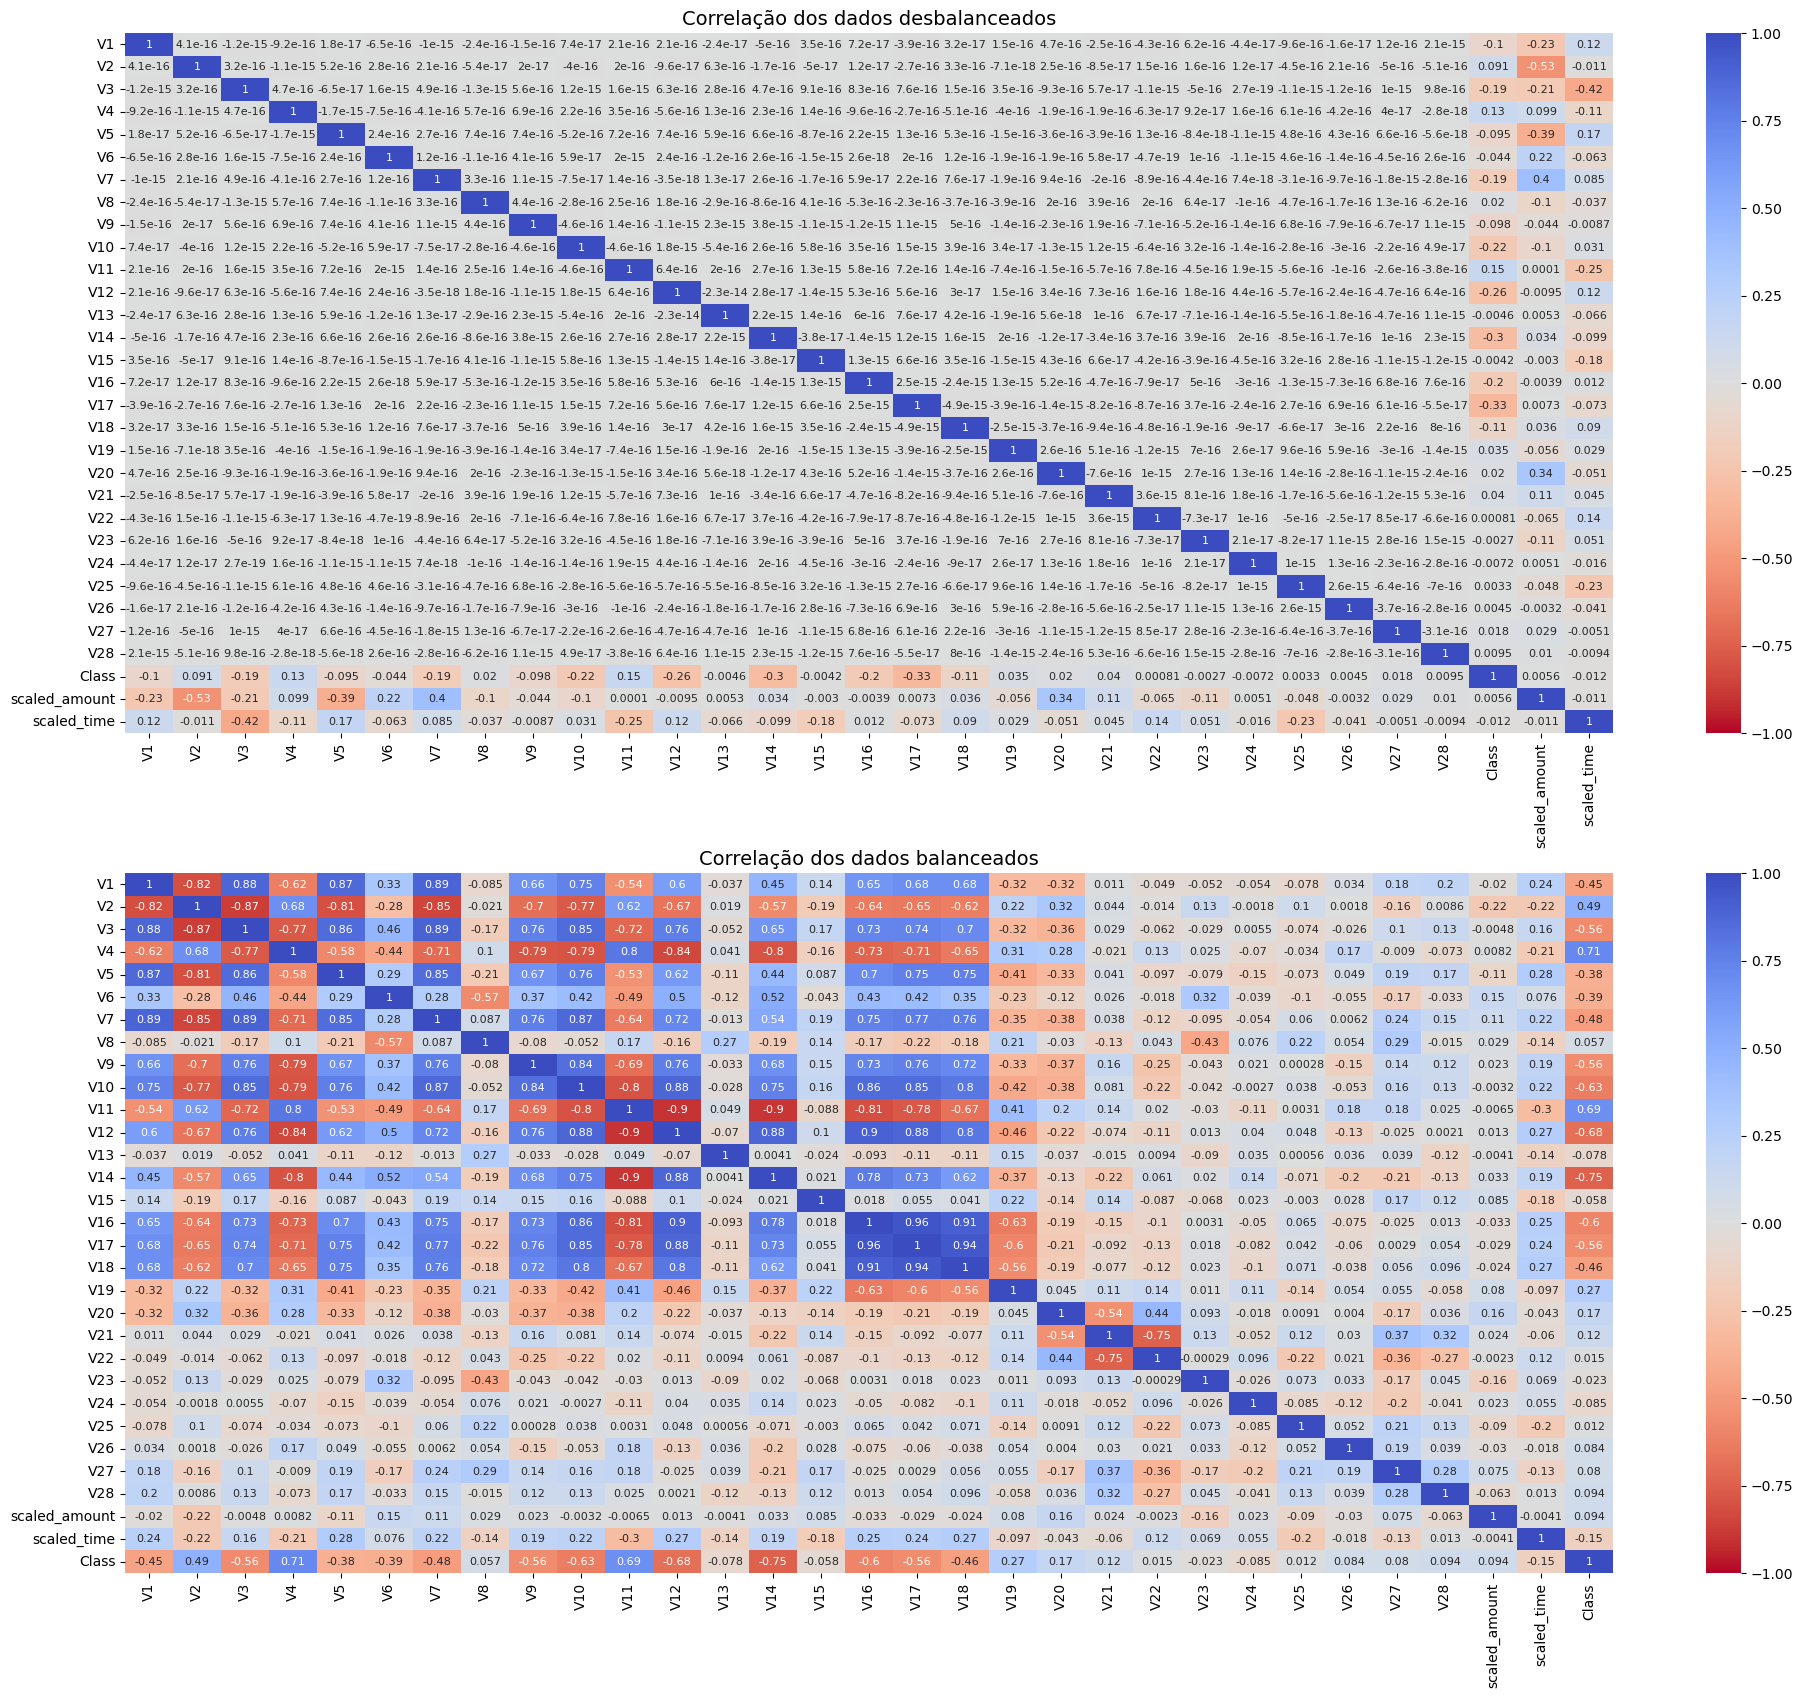

In [18]:
# criando um heatmap com as correlações entre as variáveis
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

# correlação do dataframe original
corr = df.corr()
sns.heatmap(corr,
            cmap='coolwarm_r',
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size': 8},
            ax=ax1)
ax1.set_title('Correlação dos dados desbalanceados', fontsize=14)

# correlação do dataframe balanceado
sub_sample_corr = balanced_combination.corr()
sns.heatmap(sub_sample_corr,
            cmap='coolwarm_r',
            annot=True,
            vmin=-1,
            vmax=1,
            annot_kws={'size': 8},
            ax=ax2)
ax2.set_title('Correlação dos dados balanceados', fontsize=14)

plt.show()

Podemos, agora, analisar a correlação de cada variáveis com "class" (ou seja, a transação ser fraudulenta ou não).

V2, V4 e V11: forte correlação positiva
V10, V12, V14, V16: forte correlação negativa

# Removendo outliers

In [20]:
def remove_outliers_iqr(df, columns, threshold=1.5):
    df_outliers_removed = df.copy()
    
    for column in columns:
        q1 = df_outliers_removed[column].quantile(0.25)
        q3 = df_outliers_removed[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        
        df_outliers_removed = df_outliers_removed[(df_outliers_removed[column] >= lower_bound) &
                                                  (df_outliers_removed[column] <= upper_bound)]
    
    return df_outliers_removed

# aplicando a remoção de outliers no dataset
df_sem_out = remove_outliers_iqr(balanced_combination, ['V2', 'V4', 'V11', 'V10', 'V12', 'V14', 'V16'])

# informações estatísticas antes e depois da remoção dos outliers
print("Antes da remoção dos outliers:")
print(balanced_combination[['V2', 'V4', 'V11', 'V10', 'V12', 'V14', 'V16']].describe())
print("Depois da remoção dos outliers:")
print(df_sem_out[['V2', 'V4', 'V11', 'V10', 'V12', 'V14', 'V16']].describe()) 


Antes da remoção dos outliers:
               V2          V4         V11         V10         V12         V14  \
count  984.000000  984.000000  984.000000  984.000000  984.000000  984.000000   
mean     1.816713    2.257353    1.905015   -2.820320   -3.131755   -3.477570   
std      3.675483    3.207699    2.767834    4.548610    4.588050    4.666041   
min     -8.402154   -4.519509   -2.382493  -24.588262  -18.683715  -19.214325   
25%     -0.150957   -0.140560   -0.182444   -4.572043   -5.495221   -6.721799   
50%      0.940617    1.302623    1.089117   -0.865787   -0.816557   -1.009716   
75%      2.798885    4.202830    3.586502    0.025215    0.238259    0.144960   
max     22.057729   12.114672   12.018913    9.386945    1.928119    3.442422   

              V16  
count  984.000000  
mean    -2.064206  
std      3.474123  
min    -14.129855  
25%     -3.543426  
50%     -0.597642  
75%      0.290075  
max      3.139656  
Depois da remoção dos outliers:
               V2          

# Modelo

In [23]:
# separando X e y na base balanceada.
X = df_sem_out.drop('Class', axis=1)
y = df_sem_out['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [24]:
# transformando em array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## Regressão Logística

In [25]:
# definindo os hiperparâmetros a serem ajustados
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# criando o modelo de regressão logística
logistic_reg = LogisticRegression()

# ajustando os hiperparâmetros com Grid Search Cross Validation
grid_search_reg = GridSearchCV(logistic_reg, parameters, cv=5, n_jobs=-1)
grid_search_reg.fit(X_train, y_train)
logistic_reg = grid_search_reg.best_estimator_

# obtendo os melhores hiperparâmetros
best_params = grid_search_reg.best_params_

# criando e ajusta o modelo de regressão logística com os melhores hiperparâmetros
logistic_reg = LogisticRegression(penalty=best_params['penalty'],
                                   C=best_params['C'],
                                   solver=best_params['solver'],
                                   max_iter=1000)
logistic_reg.fit(X_train, y_train)


# fazendo previsões no conjunto de teste
y_pred_reg= logistic_reg.predict(X_test)

# calculando as probabilidades das classes positivas
y_prob = logistic_reg.predict_proba(X_test)[:, 1]

# avaliando o desempenho do modelo
print(classification_report(y_test, y_pred_reg))

roc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       101
           1       0.93      0.94      0.94        54

    accuracy                           0.95       155
   macro avg       0.95      0.95      0.95       155
weighted avg       0.96      0.95      0.95       155

ROC AUC Score: 98.75%


In [26]:
# registrando quais foram os melhores hiperparâmetros
print(grid_search_reg.best_params_)

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


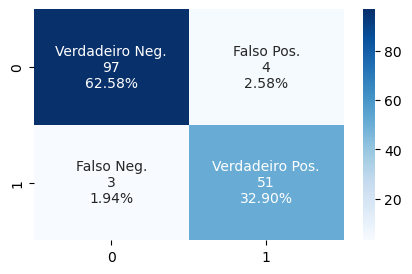

In [27]:
# plotando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_reg)
nomes = ['Verdadeiro Neg.','Falso Pos.','Falso Neg.','Verdadeiro Pos.']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5, 3))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.show();

## Decision Tree Classifier

In [28]:
# definindo os parâmetros a serem testados
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

# criando e ajustando o modelo de árvore de decisão com Grid Search CV
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, params, cv=5)
grid_search_dt.fit(X_train, y_train)

# fazendo as previsões no conjunto de teste usando o modelo ajustado
y_pred_dt = grid_search_dt.predict(X_test)
dt = grid_search_dt.best_estimator_

# ajustando o modelo Random Forest
dt.fit(X_train, y_train)

# avaliando o desempenho do modelo ajustado
print(classification_report(y_test, y_pred_dt))

y_prob = grid_search_dt.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       101
           1       0.80      0.83      0.82        54

    accuracy                           0.87       155
   macro avg       0.86      0.86      0.86       155
weighted avg       0.87      0.87      0.87       155

ROC AUC Score: 95.41%


In [29]:
# registrando quais foram os melhores hiperparâmetros
print(grid_search_dt.best_params_)

{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}


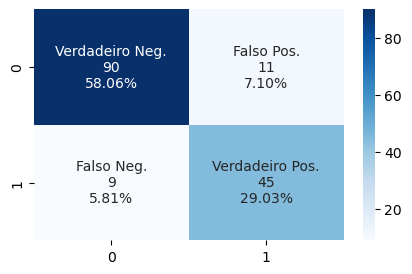

In [30]:
# plotando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_dt)
nomes = ['Verdadeiro Neg.','Falso Pos.','Falso Neg.','Verdadeiro Pos.']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5, 3))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.show();

## Random Forest Classifier

In [31]:
# definindo modelo
rfc = RandomForestClassifier(random_state=42)

# definindo espaço de busca de hiperparâmetros
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# definindo estratégia de validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# realziando busca em grade de hiperparâmetros
rfc_grid = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=cv,
    scoring="f1",
    n_jobs=-1,
    error_score=0
    
)

# treinando modelo com busca em grade de hiperparâmetros
rfc_grid.fit(X_train, y_train)
rfc = rfc_grid.best_estimator_

# ajustando o modelo Random Forest
rfc.fit(X_train, y_train)

# fazendo as previsões no conjunto de teste usando o modelo ajustado
y_pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, y_pred_rfc))

y_prob = rfc_grid.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       101
           1       0.92      0.89      0.91        54

    accuracy                           0.94       155
   macro avg       0.93      0.92      0.93       155
weighted avg       0.94      0.94      0.94       155

ROC AUC Score: 98.66%


In [32]:
print("Melhores hiperparâmetros:", rfc_grid.best_params_)

Melhores hiperparâmetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


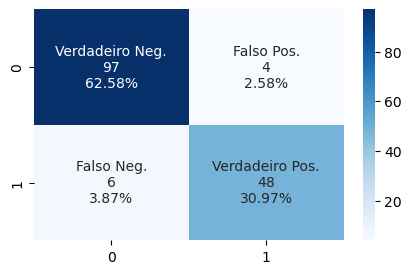

In [33]:
# plotando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_rfc)
nomes = ['Verdadeiro Neg.','Falso Pos.','Falso Neg.','Verdadeiro Pos.']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5, 3))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.show();

## Support Vector Machine

In [34]:
# definindo os hiperparâmetros a serem ajustados
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}

# criando o modelo SVM
svm = SVC()

# ajustando os hiperparâmetros com Grid Search Cross Validation
grid_search_svm = GridSearchCV(svm, parameters, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
svm = grid_search_svm.best_estimator_

# obtendo os melhores hiperparâmetros
best_params = grid_search_svm.best_params_

# criando e ajusta o modelo SVM com os melhores hiperparâmetros
svm = SVC(C=best_params['C'], kernel=best_params['kernel'], probability=True)
svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [35]:
# fazendo previsões no conjunto de teste
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# avaliando o desempenho do modelo
print(classification_report(y_test, y_pred_svm))

roc = roc_auc_score(y_test, y_prob_svm)
print(f"ROC AUC Score: {roc * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.94      0.94      0.94        54

    accuracy                           0.96       155
   macro avg       0.96      0.96      0.96       155
weighted avg       0.96      0.96      0.96       155

ROC AUC Score: 98.57%


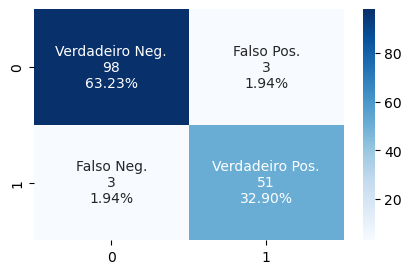

In [36]:
# plotando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_svm)
nomes = ['Verdadeiro Neg.','Falso Pos.','Falso Neg.','Verdadeiro Pos.']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5, 3))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.show();

### Comparando os modelos

In [37]:
# criando um DataFrame com as métricas de cada modelo
log_reg_metrics = pd.DataFrame(classification_report(y_test, y_pred_reg, output_dict=True)).T
svm_metrics = pd.DataFrame(classification_report(y_test, y_pred_svm, output_dict=True)).T
dt_metrics = pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).T
rfc_metrics = pd.DataFrame(classification_report(y_test, y_pred_rfc, output_dict=True)).T

In [38]:
print(log_reg_metrics)

              precision    recall  f1-score     support
0              0.970000  0.960396  0.965174  101.000000
1              0.927273  0.944444  0.935780   54.000000
accuracy       0.954839  0.954839  0.954839    0.954839
macro avg      0.948636  0.952420  0.950477  155.000000
weighted avg   0.955114  0.954839  0.954934  155.000000


In [39]:
print(svm_metrics)

              precision    recall  f1-score    support
0              0.970297  0.970297  0.970297  101.00000
1              0.944444  0.944444  0.944444   54.00000
accuracy       0.961290  0.961290  0.961290    0.96129
macro avg      0.957371  0.957371  0.957371  155.00000
weighted avg   0.961290  0.961290  0.961290  155.00000


In [40]:
print(dt_metrics)

              precision    recall  f1-score     support
0              0.909091  0.891089  0.900000  101.000000
1              0.803571  0.833333  0.818182   54.000000
accuracy       0.870968  0.870968  0.870968    0.870968
macro avg      0.856331  0.862211  0.859091  155.000000
weighted avg   0.872329  0.870968  0.871496  155.000000


In [41]:
print(rfc_metrics)

              precision    recall  f1-score     support
0              0.941748  0.960396  0.950980  101.000000
1              0.923077  0.888889  0.905660   54.000000
accuracy       0.935484  0.935484  0.935484    0.935484
macro avg      0.932412  0.924642  0.928320  155.000000
weighted avg   0.935243  0.935484  0.935191  155.000000
